In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv('TaxiDataCleaned.csv')

In [4]:
categorical = ['pickup_community_area', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 'dropoff_community_area', 'payment_type', 'company']
numerical = ['trip_start_timestamp', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'fare', 'trip_seconds', 'tips']
for col in categorical:
    data[col] = data[col].astype('category')

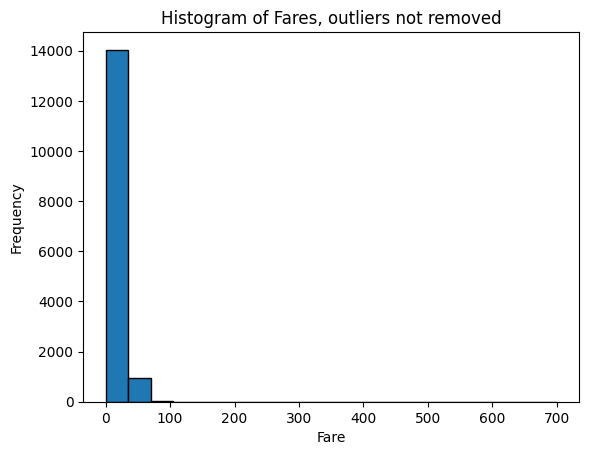

In [5]:
# Histogram for Fare Distribution
plt.title('Histogram of Fares, outliers not removed')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.hist(data['fare'], bins=20, edgecolor='black')
plt.show()

In [6]:
print(data['fare'].describe())

count    15002.000000
mean        11.768216
std         11.538850
min          0.000000
25%          5.850000
50%          7.850000
75%         12.450000
max        700.070000
Name: fare, dtype: float64


In [27]:
print(data['fare'][data['fare'] < data['fare'].quantile(0.99)].describe())

count    14849.000000
mean        11.273164
std          8.964912
min          0.000000
25%          5.850000
50%          7.850000
75%         12.250000
max         45.000000
Name: fare, dtype: float64


In [28]:
print(data['fare'][data['fare'] < data['fare'].quantile(0.95)].describe())

count    14240.000000
mean        10.095257
std          7.053863
min          0.000000
25%          5.850000
50%          7.650000
75%         11.450000
max         36.050000
Name: fare, dtype: float64


In [8]:
for category in categorical:
    grouped = data.groupby(category).agg({'fare':'mean', 'tips':'count'})    
    grouped.sort_values(by='fare',ascending=False, inplace=True)
    print(grouped)
    # print(argmax(grouped['fare'])) 

                            fare  tips
pickup_community_area                 
49.0                   33.620000     1
76.0                   32.487464   895
63.0                   28.250000     1
71.0                   27.900000     2
56.0                   27.478471   255
...                          ...   ...
68.0                    4.325000     2
58.0                    4.250000     2
69.0                    4.000000     3
9.0                     3.250000     1
66.0                    3.250000     1

[62 rows x 2 columns]
                       fare  tips
trip_start_month                 
6                 12.654040  1302
5                 12.355782  1311
9                 12.191915  1217
10                12.129305  1353
7                 11.722303  1255
3                 11.700902  1275
8                 11.660359  1308
4                 11.613442  1293
11                11.585350  1215
12                11.189551  1247
1                 11.135125  1079
2                 11.056530 

C:\Users\mouli\AppData\Local\Temp\ipykernel_201612\283589403.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(category).agg({'fare':'mean', 'tips':'count'})
C:\Users\mouli\AppData\Local\Temp\ipykernel_201612\283589403.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(category).agg({'fare':'mean', 'tips':'count'})
C:\Users\mouli\AppData\Local\Temp\ipykernel_201612\283589403.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True t

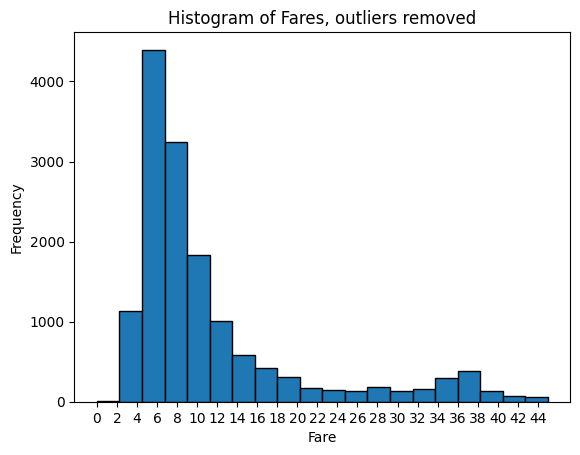

In [9]:
plt.hist(data['fare'][(data['fare'] < data['fare'].quantile(0.99)) & (data['fare'] > data['fare'].quantile(0.001))], bins=20, edgecolor='black')
plt.title('Histogram of Fares, outliers removed')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 46, 2))
plt.show()

Range of fare=700 USD\
There are some extreme outliers, since most of the fares are way lower than 50. We will need to ignore these outliers for a more detailed and meaningful histogram\
The mean is 11.76, median is 7.85 and standard deviation is 11.53\
The mode of the tips (as seen in the histogram right above) comes out to be around 6 USD.\
Deleting outliers from both sides is necessary since even a fare of 0 is likely to be a misreport (why would a taxi driver ferry passengers for free?)\
Some general clusters include that pickup community area 76 and 56 have much higher than average fares, over multiple rides (I am not considering the other areas with high averages because the counts are in single digits, so the mean might be skewed.)\
There is a higher likelihood of getting a passenger around hour 19 (presumably because people are returning from work at 7), and fares are higher early in the morning (probably due to less competition from other cabs willing to ferry passengers at low fares)\
Credit card and cash are the dominant payment methods, with not much difference in the fares given.

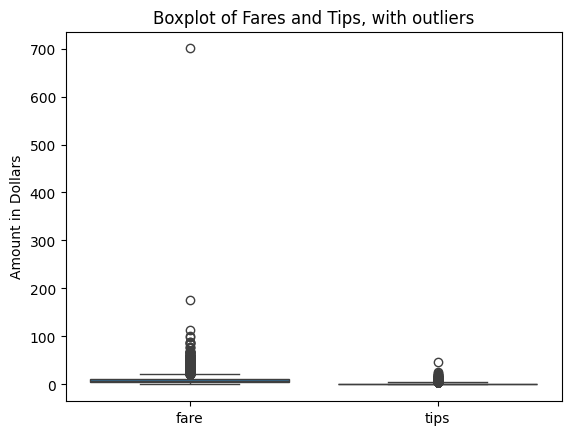

In [10]:
sns.boxplot(data[['fare','tips']])
plt.title('Boxplot of Fares and Tips, with outliers')
plt.ylabel('Amount in Dollars')
plt.show()

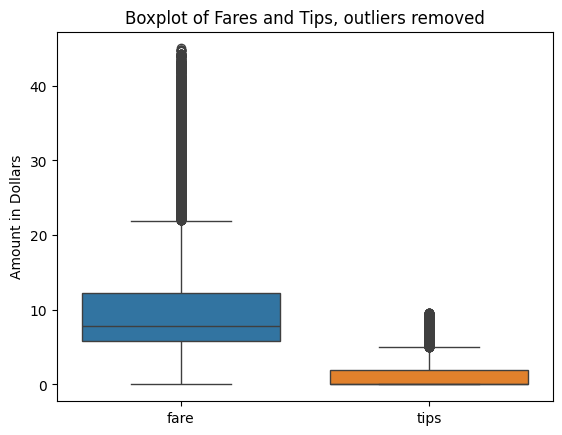

In [11]:
sns.boxplot([data['fare'][(data['fare'] < data['fare'].quantile(0.99)) & (data['fare'] > data['fare'].quantile(0.001))], data['tips'][(data['tips'] < data['tips'].quantile(0.99))]])
plt.title('Boxplot of Fares and Tips, outliers removed')
plt.ylabel('Amount in Dollars')
plt.show()

The range of tips is 47, from 0 up to 47.\
The mean is 1.07, median is 0 and standard deviation is 2.15.\
When excluding the extreme outliers, we have a range of round 9.5, with a mean of 0.965685 and std of 1.825987 (median continues to be 0) \
The overwhelming majority of tips is 0, with reasonably high numbers of people willing to give 2 dollars in tips

In [12]:
data['tips'].describe()

count    15002.000000
mean         1.076674
std          2.158340
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         47.000000
Name: tips, dtype: float64

In [13]:
data['tips'][(data['tips'] < data['tips'].quantile(0.99))].describe()

count    14849.000000
mean         0.965685
std          1.825987
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          9.570000
Name: tips, dtype: float64

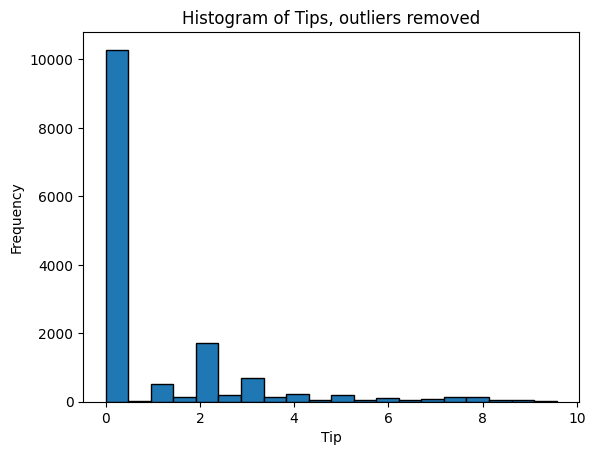

In [14]:
plt.hist(data['tips'][(data['tips'] < data['tips'].quantile(0.99))], bins=20, edgecolor='black')
plt.title('Histogram of Tips, outliers removed')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

C:\Users\mouli\AppData\Local\Temp\ipykernel_201612\2388837537.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_values=data.groupby('payment_type').agg({'fare':'sum'})
C:\Users\mouli\AppData\Local\Temp\ipykernel_201612\2388837537.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  large_categories_values=payment_values[payment_counts / total >= threshold2]
C:\Users\mouli\AppData\Local\Temp\ipykernel_201612\2388837537.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  small_categories_values=payment_values[payment_counts / total < threshold2]
C:\Users\mouli\AppData\Local\Temp\ipykernel_201612\2388837537.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

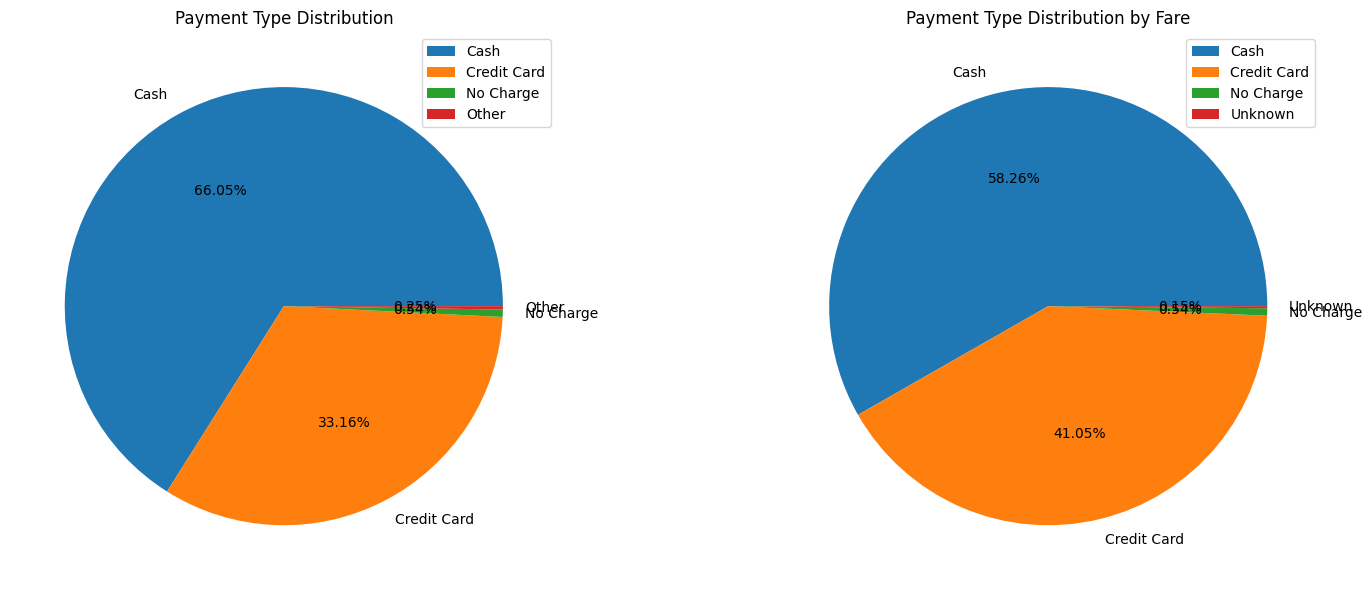

In [15]:
payment_counts = data['payment_type'].value_counts()
payment_values=data.groupby('payment_type').agg({'fare':'sum'})

threshold = 0.005  
threshold2 = 0.0015

total = payment_counts.sum()
total_values=payment_values.sum()
large_categories = payment_counts[payment_counts / total >= threshold]
large_categories_values=payment_values[payment_counts / total >= threshold2]

small_categories = payment_counts[payment_counts / total < threshold]
small_categories_values=payment_values[payment_counts / total < threshold2]
large_categories['Other'] = small_categories.sum()
large_categories_values['Other'] = small_categories_values.sum()

figure, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].pie(large_categories, labels=large_categories.index, autopct='%1.2f%%')
axes[0].set_title('Payment Type Distribution')
axes[0].legend()
axes[1].pie(large_categories_values['fare'], labels=large_categories_values.index, autopct='%1.2f%%')
axes[1].set_title('Payment Type Distribution by Fare')
axes[1].legend()

plt.tight_layout()
plt.show()


In [16]:
grouped=data.groupby('payment_type').agg({'fare':'mean', 'tips':'mean', 'trip_seconds':'count'})
grouped.reset_index(inplace=True)

C:\Users\mouli\AppData\Local\Temp\ipykernel_201612\1889612315.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=data.groupby('payment_type').agg({'fare':'mean', 'tips':'mean', 'trip_seconds':'count'})


In [17]:
grouped.sort_values(by='fare',ascending=False, inplace=True)

In [18]:
print(grouped)

  payment_type       fare      tips  trip_seconds
1  Credit Card  14.560460  3.239668          4975
3    No Charge  11.803827  0.000000            81
0         Cash  10.375767  0.001519          9909
2      Dispute   9.600000  0.000000             4
6      Unknown   9.212069  0.685172            29
4        Pcard   8.433333  0.000000             3
5       Prcard   8.050000  0.000000             1


We notice that most payments take place via credit card or cash. The average fare in all cases is roughly the same. Credit card fares have a higher average due to the higher outliers generally being paid using card. Tips are significantly higher when a card is being used, hence taxi drivers should likely ask more customers to pay by card than cash. This suggest that taxxi companies should ensure that their drivers have card machines in their cabs.

<Axes: xlabel='payment_type', ylabel='tips'>

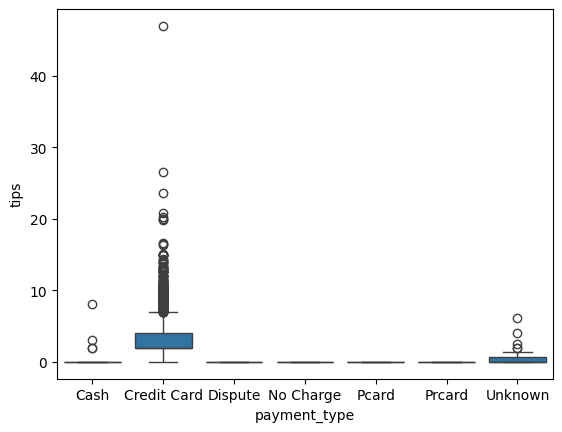

In [19]:
sns.boxplot(x=data['payment_type'], y=data['tips'])

<Axes: xlabel='payment_type', ylabel='tips'>

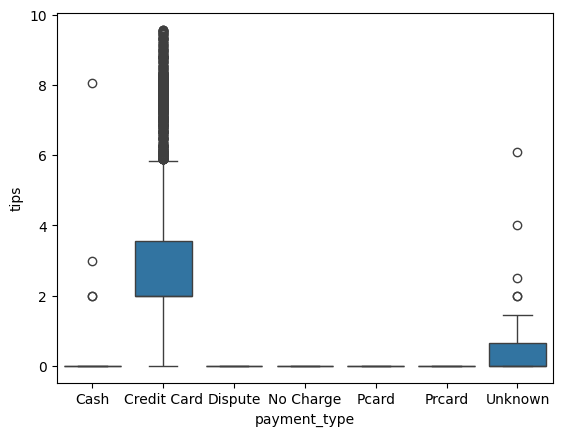

In [20]:
sns.boxplot(x=data['payment_type'][(data['tips'] < data['tips'].quantile(0.99))], y=data['tips'][(data['tips'] < data['tips'].quantile(0.99))])

As we can see, even without considering outliers, payments using credit cards have much higher tips. There are some outliers who pay high tips using cash as well, but in general the tip values from cash, pcard and prcard are very low. The variability in credit card tips is also very high, as evidenced by the large number of values outside the interquartile range in the boxplot. 

Text(0, 0.5, 'Fare')

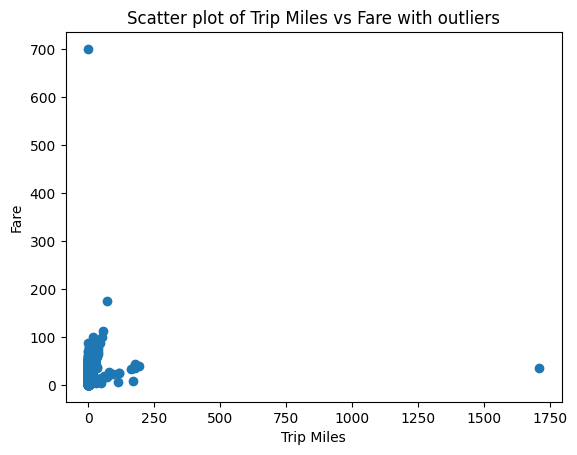

In [29]:
plt.scatter(data['trip_miles'], data['fare'])
plt.title('Scatter plot of Trip Miles vs Fare with outliers')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

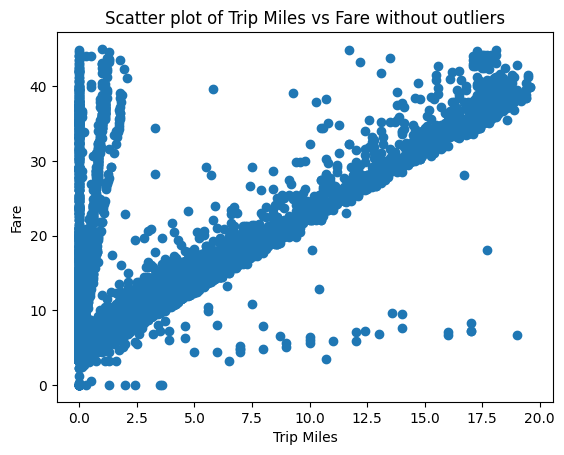

In [30]:
plt.scatter(data['trip_miles'][(data['fare'] < data['fare'].quantile(0.99))&(data['trip_miles']<data['trip_miles'].quantile(0.99))], data['fare'][(data['fare'] < data['fare'].quantile(0.99))&(data['trip_miles']<data['trip_miles'].quantile(0.99))])
plt.title('Scatter plot of Trip Miles vs Fare without outliers')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')

This shows that a larger number of smaller trips are more profiable than a few large trips, since for the same fare, you are likely to find both long-haul and short-haul customers, with short-haul trips resulting in much better earnings.

In [22]:
np.corrcoef(data['trip_miles'][(data['fare'] < data['fare'].quantile(0.99))&(data['trip_miles']<data['trip_miles'].quantile(0.99))], data['fare'][(data['fare'] < data['fare'].quantile(0.99))&(data['trip_miles']<data['trip_miles'].quantile(0.99))])

array([[1.        , 0.72709785],
       [0.72709785, 1.        ]])

There is a significant positive correlation between the fare and trip miles.